# Calculating waveguide dispersion delay
The cut off frequency for a waveguide is given by

$$f_c = \frac{1}{2\sqrt{\mu\epsilon}} \sqrt{\left(\frac{m}{a}\right)^2 + \left(\frac{n}{b}\right)^2}$$

where m, n are the propagation modes, a, b are the sides of the rectangular waveguide (a is longest by convention).

The wave group velocity inside a waveguide is given by

$$ v_g = v\sqrt{1-\frac{f_c^2}{f^2}}$$

Where $f_c$ is the cut off frequency, v is the wave speed in the medium (c in vacuum) and f is the waveg frequency.

The delay $\tau_g$ of a wave propagating along a waveguide of distance $l$ is given by

$$\tau_g = \tau_{wg}-\tau_{vacuum}$$

$$\tau_{wg,vacuum} = \frac{l}{v_g, c}$$



In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import constants as konst

import sys
sys.path.append('../')
import skreflectometry

from skreflectometry import waveguides

%matplotlib inline

In [2]:
waveguide = "WR-15"
size = 50
wg_length = 4
a,b = waveguides.get_dimensions(waveguide)
f = waveguides.get_frequencies(waveguide, size=size)
fc = waveguides.cutoff(a)
vg = waveguides.group_velocity(f,fc=fc)

delay = waveguides.propagation_delay(vg, wg_length )

Text(0,0.5,'Group velocity [m/s]')

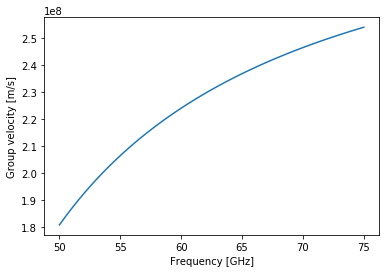

In [3]:
plt.plot(f/1e9,vg)
plt.xlabel('Frequency [GHz]')
plt.ylabel('Group velocity [m/s]')

(0, 22.432855534419595)

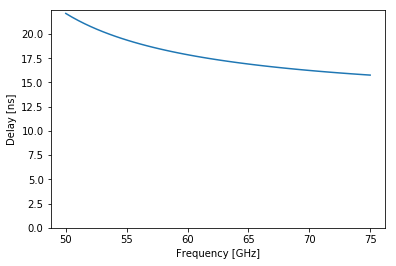

In [4]:
plt.plot(f/1e9,delay*1e9)
plt.xlabel('Frequency [GHz]')
plt.ylabel('Delay [ns]')
plt.ylim(ymin=0)

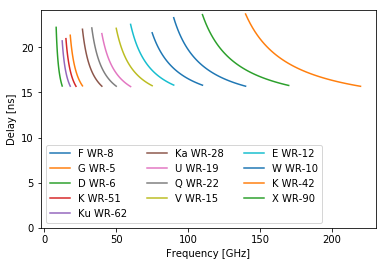

In [8]:
for waveguide in waveguides.waveguide_standards.keys():
    
    size = 50
    wg_length = 4
    a,b = waveguides.get_dimensions(waveguide)
    f = waveguides.get_frequencies(waveguide, size=size)
    fc = waveguides.cutoff(a)
    vg = waveguides.group_velocity(f,fc=fc)

    delay = waveguides.propagation_delay(vg, wg_length)
    plt.plot(f/1e9, delay*1e9, label="%s %s"%(waveguides.get_band(waveguide), waveguide))
    
plt.xlabel('Frequency [GHz]')
plt.ylabel('Delay [ns]')
plt.ylim(ymin=0)
plt.legend(loc='best', ncol=3)